# Section 3


In [13]:
# ensure src is in path
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pandas as pd
import numpy as np

import scipy.stats
import pylab

import matplotlib.pyplot as plt

[3.14 Loading the Data -
Udemy](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275478#overview)


In [15]:
raw_csv_data = pd.read_csv("../data/Index2018.csv")

In [16]:
# Preserve a copy of the unaltered DataFrame
df_comp = raw_csv_data.copy()

## Initial explorations


- [3.15 Examining the
  Data](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275480#overview)


In [17]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Note that the average price for the S&P is quite lower. The maximum value of the S&P is lower than the minimum value of the FTSE and Nikkei.

This difference in magnitude will need to be taken into account when making comparisons.

Values for the Dax and FTSE are similar.
S&P is smaller, Nikkei is larger.


In [18]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Check for missing values


In [19]:
# remember: isna() returns a boolean series
# use sum to get total na per column
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the Data


- [3.16 Plotting the
  Data](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275482#overview)


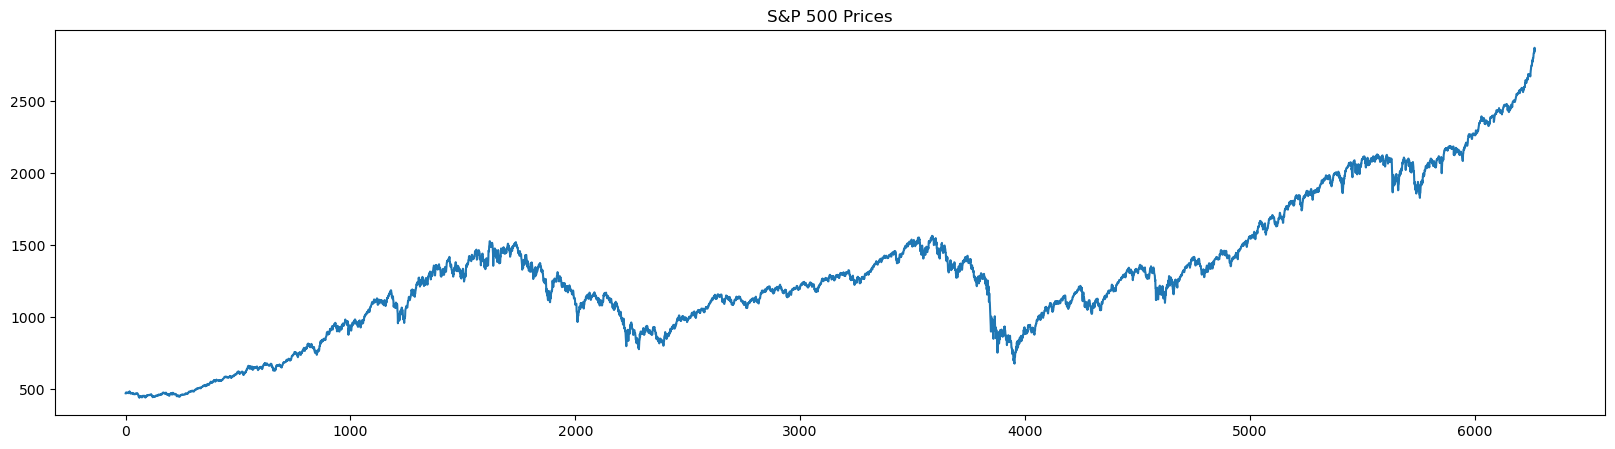

In [20]:
# S&P 500
df_comp.spx.plot(
    figsize=(20, 5),
    title="S&P 500 Prices"
)
plt.show()

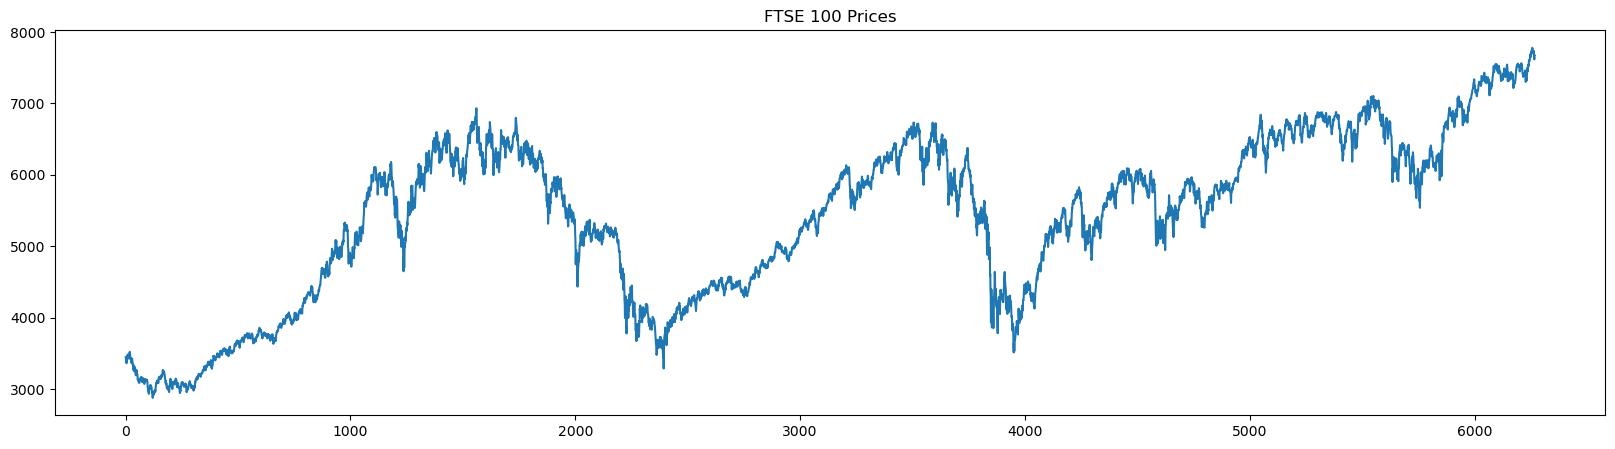

In [21]:
# FTSE 100
df_comp.ftse.plot(
    figsize=(20, 5),
    title="FTSE 100 Prices"
)
plt.show()

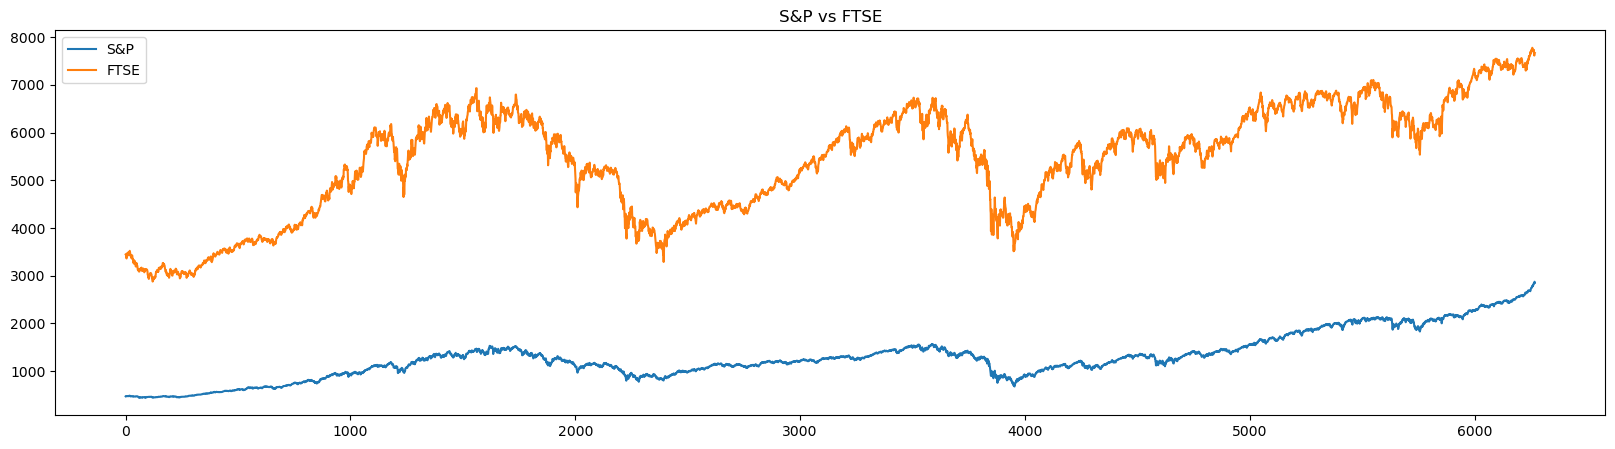

In [22]:
# S&P 500 vs FTSE 100

df_comp["spx"].plot(
    figsize=(20, 5),
    title="S&P500 Prices",
    label='S&P')

df_comp["ftse"].plot(
    figsize=(20, 5),
    title="FTSE 100 Prices",
    label="FTSE")

plt.title("S&P vs FTSE")

plt.legend()
plt.show()

- [3.17 QQ Plot](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275490#overview)


Helps determine if distribution fits specific distribution (normal by
default).

Reminders:

- x-axis: how many standard deviations from the mean these values are.
- red line: What the data points should follow if the points are normally
  distributed

This data is not normally distributed (note the values clustering around 500)


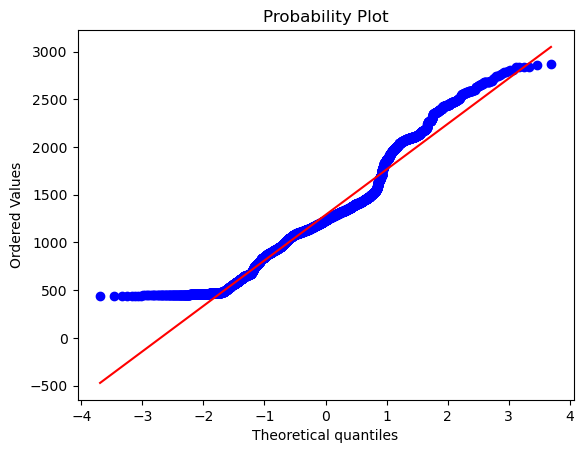

In [23]:
scipy.stats.probplot(
    df_comp["spx"],
    plot=pylab
)

pylab.show()

## Convert to time series, split data for training and testing


- [3.18 Transforming string imports to DateTime
  values](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275494#overview)


Length of date colum.

- call `describe` method
- If column is text ,`top` is completely arbitrary
  - all non-empty `string` values are considered `1`, so this ends up being arbitrary

The `pd.to_datetime` method assumes the date is a `str` in "mm/dd/yyy" form.

The data in this table is saved as "dd/mm/yy" format.


In [24]:
df_comp['date'].describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [25]:
df_comp["date"] = pd.to_datetime(
    df_comp["date"],
    dayfirst=True)

In [26]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [28]:
df_comp["date"].describe(
    datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [29]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


- [3.19 Using Date as an
  Index](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275496#overview)

Set `date` column to index.

Remember: once the `date` column is an index, it cannot be treated as a
column.


In [30]:
df_comp.set_index(
    "date",
    inplace=True)

In [31]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


- [3.20 Setting the
  Frequency](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275498#overview)

`.as_freq()` method

- 'h' - hourly
- 'w' - weekly
- 'd' - daily
- 'm' - monthly
- 'a' - annual (yearly)

If values don't exist for generated date, the columns will be populated
with `NaN` values.


In [32]:
df_comp = df_comp.asfreq('d')

In [34]:
# note the NaN values for 01-08 and 01-09
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


Financial data is not recorded on weekends or holidays.

The dates `1994-01-08` and `1994-01-09` are Saturday and Sunday.
